# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [233]:
#Import modules and read in 'data/world_bank_projects.json' file to a datafrome. Inspect dataframe structure.

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_json('data/world_bank_projects.json')
df.head()


,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [219]:
# 1. Find the 10 countries with most projects.
# --------------------------------------------

# Group the dataframe by the 'countryname' column, and since each row represents a single project,
# use the .size() method to count the number of projects per country. 
grouped_df = df.groupby('countryname').size()

# Apply the .sort_values() method on the resulting series, with the 'ascending=False' argument to get 
# list of countries sorted (descending) by greatest number of projects.
sorted_df = grouped_df.sort_values(ascending=False)

# Create a subseries of the first 10 entries of the sorted series. 
# Print the solution.
solution_1 = sorted_df.head(10)
print("The top 10 countries with the most projects are:" + "\n")
for i in range(len(solution_1)):
    print(solution_1.index[i] + " (Number of projects: " + str(solution_1[i]) + ")")


The top 10 countries with the most projects are:

People's Republic of China (Number of projects: 19)
Republic of Indonesia (Number of projects: 19)
Socialist Republic of Vietnam (Number of projects: 17)
Republic of India (Number of projects: 16)
Republic of Yemen (Number of projects: 13)
Nepal (Number of projects: 12)
People's Republic of Bangladesh (Number of projects: 12)
Kingdom of Morocco (Number of projects: 12)
Africa (Number of projects: 11)
Republic of Mozambique (Number of projects: 11)


The top 10 major project themes are:

Environment and natural resources management (Number of instances: 250)
Rural development (Number of instances: 216)
Human development (Number of instances: 210)
Public sector governance (Number of instances: 199)
Social protection and risk management (Number of instances: 168)
Financial and private sector development (Number of instances: 146)
Social dev/gender/inclusion (Number of instances: 130)
Trade and integration (Number of instances: 77)
Urban development (Number of instances: 50)
Economic management (Number of instances: 38)


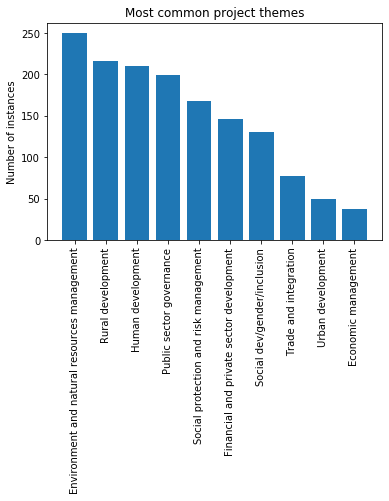

In [220]:
# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
# ------------------------------------------------------------------------

# Each entry for 'mjtheme_namecode' is a list of dictionaries with 'code', 'name' keys.
# To access single theme name j for project i, use df['mjtheme_namecode'][i][j]['name'].

# Initialize an empty dict
themes_dict = {}

# Use a nested for loop to create a dict item for every theme name and code listed. 
# This is needed because some theme names are missing and will need to be looked up in a later step.
for i in df['mjtheme_namecode']:
    for j in i:
        if j['name'] != '':
            themes_dict[j['code']] = j['name']

# Initialize an empty list
themes_all = []

# Use a nested for loop to create a list item for every theme name listed. 
# To handle entries that have a code but no name listed, look up the code in themes_dict to get the name.
for i in df['mjtheme_namecode']:
    for j in i:   
        if j['name'] == '':
            themes_all.append(themes_dict[j['code']])
        else:
            themes_all.append(j['name'])
        
# Use a Counter to create a collection of each theme name and its count. 
# Use method .most_common() to get the highest 10 entries in the Counter.
solution_2 = Counter(themes_all).most_common(10)

# Print the solution.
print("The top 10 major project themes are:" + "\n")
for theme, num in solution_2:
    print(theme + " (Number of instances: " + str(num) + ")")

# Plot a histogram of the 10 most common themes.
theme_names = [theme for (theme, num) in solution_2]
theme_count = [num for (theme, num) in solution_2]
plt.bar(theme_names, theme_count)
plt.xticks(rotation='vertical')
plt.title('Most common project themes')
plt.ylabel('Number of instances')
plt.show()

In [240]:
# 3. In 2. above you will notice that some entries have only the code and the name is missing. 
# Create a dataframe with the missing names filled in.

# Note: some of the work for this solution was completed in the solution for part 2 and will be 
# used again here, namely the dictionary themes_dict which links the theme names and codes.

print("Example with missing value: df['mjtheme_namecode'][5] = " + str(df['mjtheme_namecode'][5]) + "\n")

# Create a copy of the dataframe that will contain the corrected missing values.
df_corrected = df.copy()

# To replace missing values when found, a nested for loop will search for missing theme names ('') 
# and replace them with the relevant name from the dictionary themes_dict.
for i in df_corrected['mjtheme_namecode']:
    for j in i:   
        if j['name'] == '':
            j['name'] = (themes_dict[j['code']])

print("Example corrected value: df_corrected['mjtheme_namecode'][5] = " + str(df_corrected['mjtheme_namecode'][5]))

Example with missing value: df['mjtheme_namecode'][5] = [{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': ''}]

Example corrected value: df_corrected['mjtheme_namecode'][5] = [{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': 'Social protection and risk management'}]
